INTRODUCTION

This notebook will focus on the dataset of employees within an organization and investigate the employment termination as well as predict future terminations and retention from the organization. Varables within the dataset will be used in this analysis.
This notebook will go through making 3 machine learning models to predict employment termination based on knowledge of employees within the organization.



**Research Analytical Questions**

The detailed research would show the organization's heterogeneity, and it would also forecast the likelihood that an employee's contract would be terminated. The following research questions are needed to accomplish these goals:
1.	What is the diversity profile of the organization?
2.	What are the trends of employment losses in the organization?
3.	How can we predict the job termination and retention of employees?


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy import stats

In [ ]:
#loading the drive and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#changing the drive
%cd "/content/drive/My Drive/Colab"

/content/drive/My Drive/Colab


In [ ]:
#loading data set and viewing the first few rows
df = pd.read_csv('HRDataset_v14.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


PRE-PROCESSING AND EXPLORATORY DATA ANALYSIS OF DATASET

In [ ]:
df.shape

(311, 36)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

1. There are 311 rows and 36 columns in the dataset.
2. 'EmpID' is for identification. It shouldn't be used for training the machine learning model but can be useful for filtering rows.
3. 'DateofTermination' has 104 entries, unlike the others with entries. 
4. Few columns such as ‘Employee_Name’, ’MarriedID’, ‘MaritalStatusID’, ‘FromDiversityJobFairID’, ‘PositionID’, ‘Zip’, ‘HispanicLatino’, ‘DaysLateLast30’, will be dropped as part of the pre-processing, as they will not add to our insight.


DROP REDUNDANT 

In [ ]:
df = df.drop(columns=['Employee_Name','MarriedID','MaritalStatusID','PositionID','Zip','HispanicLatino','ManagerID','SpecialProjectsCount','DaysLateLast30','FromDiversityJobFairID']) 

VERIFICATION OF NULL VALUES

In [ ]:
df.isna().sum()

EmpID                           0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
Salary                          0
Termd                           0
Position                        0
State                           0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
RecruitmentSource               0
PerformanceScore                0
EngagementSurvey                0
EmpSatisfaction                 0
LastPerformanceReview_Date      0
Absences                        0
dtype: int64

USING HEATMAP TO CHECK FOR NULL VALUES WITHIN  THE DATAFRAME

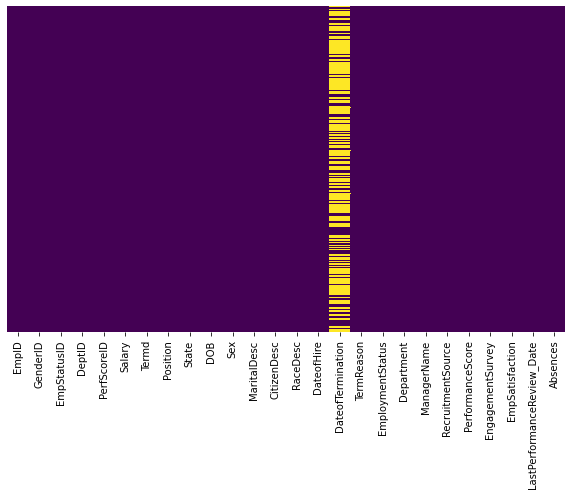

In [ ]:
#the yellow line indicates the null values 
plt.figure(figsize =(10, 6))
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

This shows that 'DateofTermination' is the only column with missing values.

In [ ]:
#checking for null values in the column
date_term_na = df[df['DateofTermination'].isnull()]
date_term_na.EmploymentStatus.value_counts()

Active    207
Name: EmploymentStatus, dtype: int64

The missing values occurs whenever 'EmploymentStatus' is 'Active'.It therefore seems sensible to keep the column as it is and not drop it, as dropping the null values will affect the structure of the data.

Only employees whose employment is terminated has the valid entries for termination date ('DateofTermination').

SUMMARIZING THE DESCRIPTIVE STATISTICS OF NUMERICAL DATA 

---



In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EmpID,311.0,10156.000000,89.922189,10001.00,10078.50,10156.00,10233.5,10311.0
GenderID,311.0,0.434084,0.496435,0.00,0.00,0.00,1.0,1.0
EmpStatusID,311.0,2.392283,1.794383,1.00,1.00,1.00,5.0,5.0
DeptID,311.0,4.610932,1.083487,1.00,5.00,5.00,5.0,6.0
PerfScoreID,311.0,2.977492,0.587072,1.00,3.00,3.00,3.0,4.0
Salary,311.0,69020.684887,25156.636930,45046.00,55501.50,62810.00,72036.0,250000.0
Termd,311.0,0.334405,0.472542,0.00,0.00,0.00,1.0,1.0
EngagementSurvey,311.0,4.110000,0.789938,1.12,3.69,4.28,4.7,5.0
EmpSatisfaction,311.0,3.890675,0.909241,1.00,3.00,4.00,5.0,5.0
Absences,311.0,10.237942,5.852596,1.00,5.00,10.00,15.0,20.0


SUMMARIZING THE CATEGORICAL DATA

In [ ]:
df.describe(include=['O']).transpose()

,count,unique,top,freq
Position,311,32,Production Technician I,137
State,311,28,MA,276
DOB,311,307,09/09/65,2
Sex,311,2,F,176
MaritalDesc,311,5,Single,137
CitizenDesc,311,3,US Citizen,295
RaceDesc,311,6,White,187
DateofHire,311,101,1/10/2011,14
DateofTermination,104,96,8/19/2018,2
TermReason,311,18,N/A-StillEmployed,207


INSPECTING THE COLUMNS OF DATA

In [ ]:
df.columns

Index(['EmpID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'Salary',
       'Termd', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'RaceDesc', 'DateofHire', 'DateofTermination',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'EmpSatisfaction', 'LastPerformanceReview_Date', 'Absences'],
      dtype='object')

DIVERSITY PROFILE OF THE ORGANIZATION: UNDERSTANDING THE HETEROGENEITY OF THE ORGANIZATION WILL GIVE USE INSIGHT ABOUT DETAILS GIVEN IN THE DATASET. I WILL EXPLORE THE INTERNAL, EXTERNAL AND ORGANIZATIONAL DIVERSITY TO GET IMPORTANT INSIGHTS AND SUMMARY ABOUT EACH DIVERSITY IS DONE BELOW EAH SECTION 

**DEMOGRAPHY OF EMPLOYEES (INTERNAL DIVERSITY)**

GENDER DISTRIBUTION IN THE ORGANIZATION

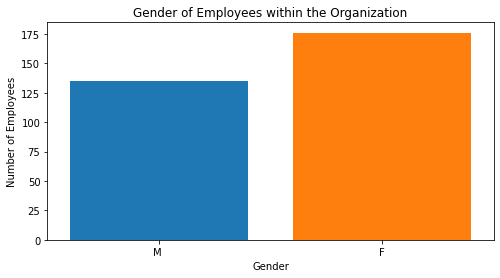

In [ ]:
plt.figure(figsize =(8, 4))
sns.countplot(x = 'Sex', data = df,  saturation = 1)
plt.title('Gender of Employees within the Organization')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.show()

GENDER DISTRIBUTION ACROSS DEPARTMENTS IN THE ORGANIZATION

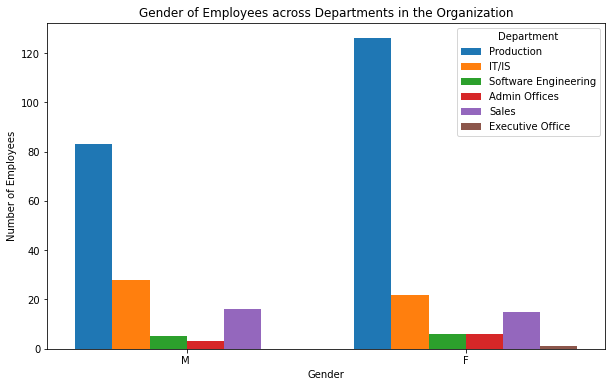

In [ ]:
plt.figure(figsize =(10, 6))
sns.countplot(x = 'Sex', hue = 'Department', data = df,  saturation = 1)
plt.title('Gender of Employees across Departments in the Organization')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.show()

RACE OF THE EMPLOYEES

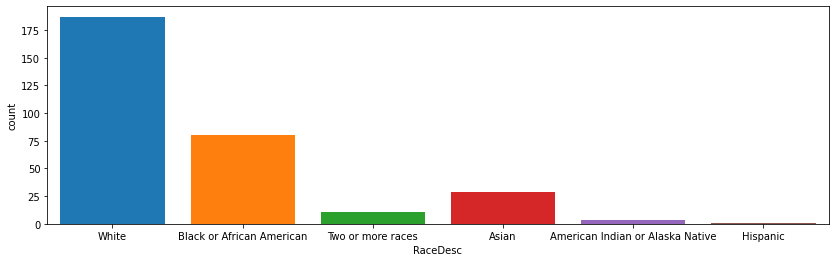

In [ ]:
plt.figure(figsize =(14, 4))
sns.countplot(x = 'RaceDesc', data = df,  saturation = 1)

GENDER DISTRIBUTION ACROSS RACE IN THE ORGANIZATION

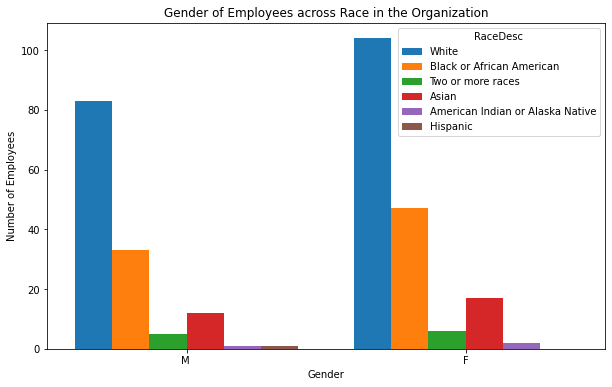

In [ ]:
plt.figure(figsize =(10, 6))
sns.countplot(x = 'Sex', hue = 'RaceDesc', data = df,  saturation = 1)
plt.title('Gender of Employees across Race in the Organization')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.show()

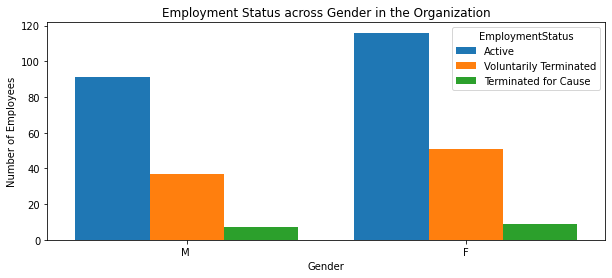

In [ ]:
plt.figure(figsize =(10, 4))
sns.countplot(x = 'Sex', hue = 'EmploymentStatus', data = df,  saturation = 1)
plt.title('Employment Status across Gender in the Organization')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.show()

AGE DISTRIBUTION

CHANGING THE 'DOB'  TO AGE FORMAT FOR USE IN CHARTS

In [ ]:
df['DOB']

0      07/10/83
1      05/05/75
2      09/19/88
3      09/27/88
4      09/08/89
         ...   
306    05/11/85
307    05/04/82
308    08/30/79
309    02/24/79
310    08/17/78
Name: DOB, Length: 311, dtype: object

In [ ]:
import datetime
from datetime import date,datetime
from dateutil.relativedelta import relativedelta

In [ ]:
dt=date.today()
dt=dt.strftime("%Y-%m-%d")

    
def days(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs(relativedelta(d2, d1).years)

In [ ]:
new_date=pd.to_datetime(df['DOB']).apply(lambda x:x.strftime("%Y-%m-%d"))
df['Age']=new_date.apply(lambda x:days(x, dt))

In [ ]:
df['Age'].value_counts()

43    23
36    23
39    22
35    21
47    21
45    18
41    18
34    17
49    17
38    17
46    16
33    14
42    14
40    12
37    12
44    12
48    12
32     7
31     5
30     4
29     3
27     1
28     1
50     1
Name: Age, dtype: int64

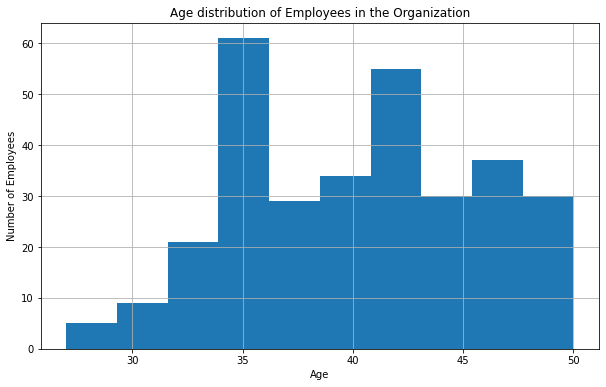

In [ ]:
plt.figure(figsize =(10, 6))
df['Age'].hist()
plt.title('Age distribution of Employees in the Organization')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.show()

**INTERNAL DIVERSITY OBSERVATIONS**
1. Females have more population in the organization
2. Females have the higher number in Production, Software Engineering, and Admin offices. The Executive office is occupied by a female, no male. Only the IT/IS and Sales department have more males
3. Whites have more population, followed by Blacks or African American, and Asians. Hispanics have the lowest number
4. Females have more number across all races.
5. The most frequent age within the organization is between 35 to 47 years of age.


**EXTERNAL DIVERSITY**

CITIZENSHIP

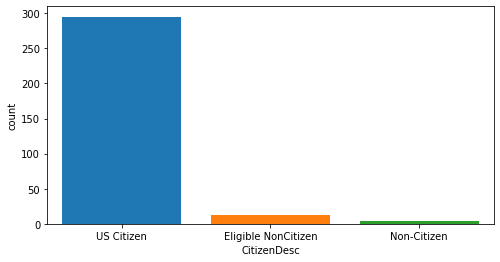

In [ ]:
plt.figure(figsize =(8, 4))
sns.countplot(x = 'CitizenDesc', data = df, saturation = 1)

GEOGRAPHICAL LOCATION

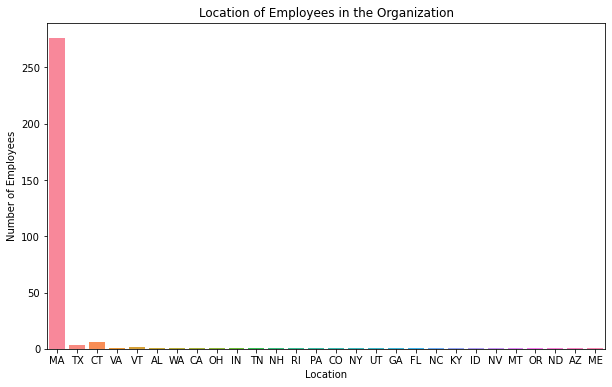

In [ ]:
plt.figure(figsize =(10, 6))
sns.countplot(x = 'State', data = df,  saturation = 1)
plt.title('Location of Employees in the Organization')
plt.xlabel('Location')
plt.ylabel('Number of Employees')
plt.show()

CHECKING TO KNOW ORGANIZATIONAL DETAILS IN 'MA'

In [ ]:
MA = df.groupby(['State','Department'])['EmpID'].count().reset_index()
MA= MA.iloc[11:17]
MA


,State,Department,EmpID
11,MA,Admin Offices,9
12,MA,Executive Office,1
13,MA,IT/IS,44
14,MA,Production,209
15,MA,Sales,2
16,MA,Software Engineering,11


**EXTERNAL DIVERSITY OBSERVATIONS**
1. A high number of employees are United States citizens which may indicate that the organization is in the United States.
2. "MA" has the highest number of employees present. This may suggest the location of the production site or head office of the organization."MA" may suggest "Massachussetts".
3. All departments have presence in "MA". Prominent is the production department with has the highest number. The 'Executive Office' is in "MA". This confirms that the production and administrative management is done in "MA". 

**ORGANIZATIONAL DIVERSITY**

DEPARTMENTS IN THE ORGANIZATION

In [ ]:
df['Department'].unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

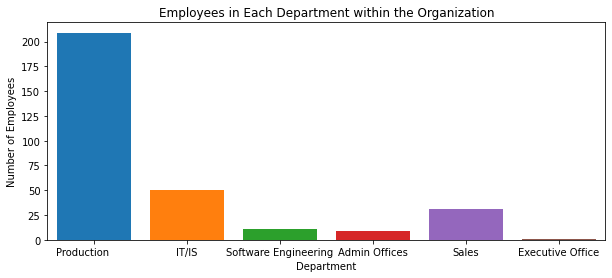

In [ ]:
df['Department'].value_counts()
plt.figure(figsize =(10, 4))
sns.countplot(x = 'Department', data = df,  saturation = 1)
plt.title('Employees in Each Department within the Organization')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

SALARY DISTRIBUTION

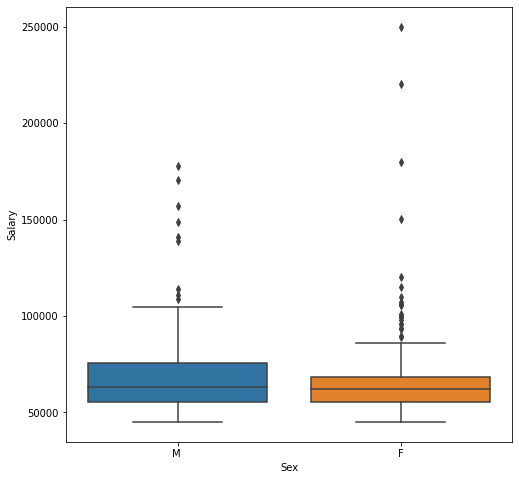

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df["Salary"], x=df["Sex"])

MANAGERS AND EMPLOYEES UNDER THEM

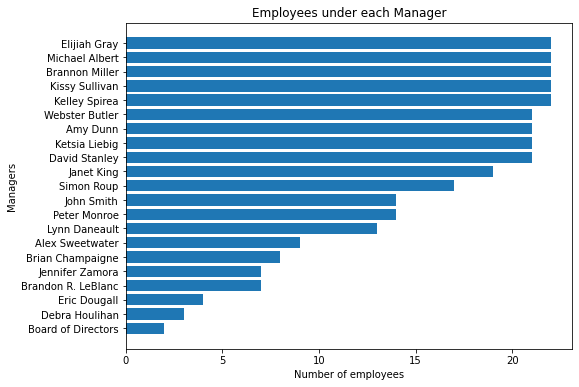

In [ ]:
emp_count = df.groupby('ManagerName')['EmpID'].count().sort_values(ascending = True).reset_index()
emp_count 

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(emp_count['ManagerName'], emp_count['EmpID'])
labels = ax.get_xticklabels()
ax.set(xlabel='Number of employees', ylabel='Managers',title='Employees under each Manager')
plt.show()

RECRUITMENT SOURCE

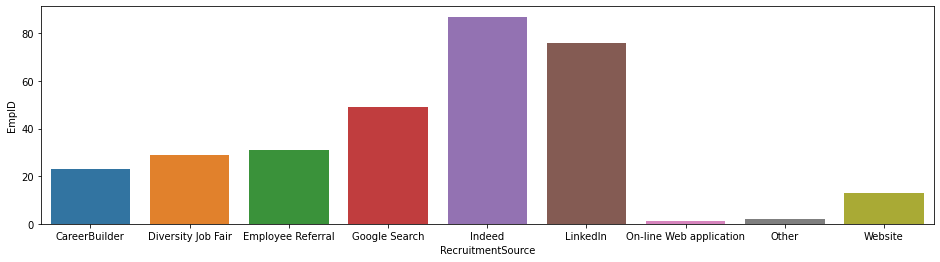

In [ ]:
recr_source = df.groupby('RecruitmentSource')['EmpID'].count().reset_index()
plt.figure(figsize =(16, 4))
sns.barplot(x= recr_source['RecruitmentSource'], y=recr_source['EmpID'] )
plt.show()

**ORGANIZATIONAL DIVERSITY OBSERVATIONS**
1. Production department have the highest number of employees, followed by IT/IS and Sales.
2. Females have higher paying jobs than males in the organization. The highest paid staff is also a female.
3. There are 5 managers with the highest number of employees under them.
4. Indeed, LinkedIn and Google Search are the most frequent sources the organiztion recruit through.

**PROBING INTO EMPLOYMENT STATUS AND REASONS FOR EMPLOYMENT TERMINATION**

EMPLOYMENT STATUS

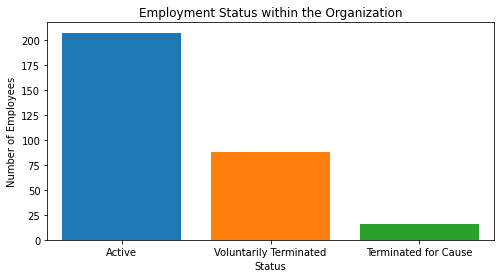

In [ ]:
plt.figure(figsize =(8, 4))
sns.countplot(x = 'EmploymentStatus', data = df,  saturation = 1)
plt.title('Employment Status within the Organization')
plt.xlabel('Status')
plt.ylabel('Number of Employees')
plt.show()

Most of the employees are actively employed. Many have voluntarily terminated while some where terminated by the management.

REASONS FOR TERMINATION

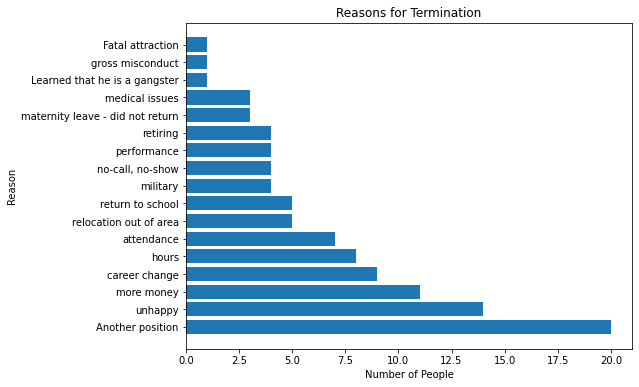

In [ ]:
app_term = df.groupby('TermReason')['EmpID'].count().sort_values(ascending = False).reset_index()
app_term = app_term.drop([0])
 
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(app_term['TermReason'], app_term['EmpID'] )
labels = ax.get_xticklabels()
ax.set(xlabel='Number of People', ylabel='Reason',
       title='Reasons for Termination')
plt.show()

Many employees left the compnay to take up other positions in other organizations. 'unhappy', 'more money', 'career change' are other common reasons for leaving their employment. There are also disciplinary terminations due to 'gross misconduct', and 'learned he is a gangster'

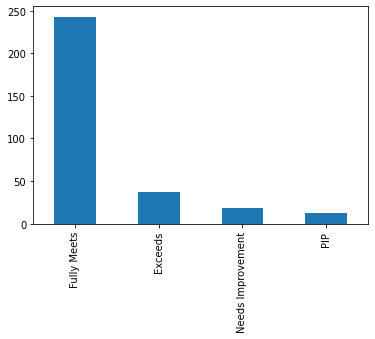

In [ ]:
#performance score evaluation
perf_sco=df['PerformanceScore'].value_counts()
perf_sco.plot(kind='bar')

Most employees fully meets up with the performance score, while some exceeds.

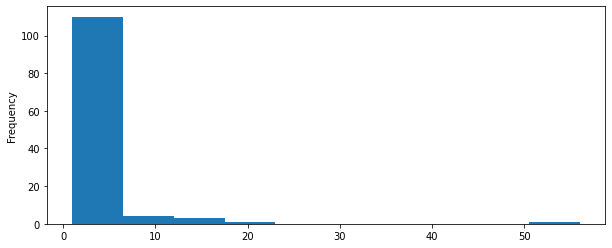

In [ ]:
plt.figure(figsize =(10, 4))
eng_surv=df['EngagementSurvey'].value_counts()
eng_surv.plot(kind='hist')

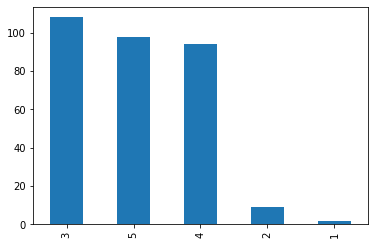

In [ ]:
plt.figure(figsize =(6, 4))
emp_sat=df['EmpSatisfaction'].value_counts()
emp_sat.plot(kind='bar')

EMPLOYMENT  STATUS ACROSS RACE

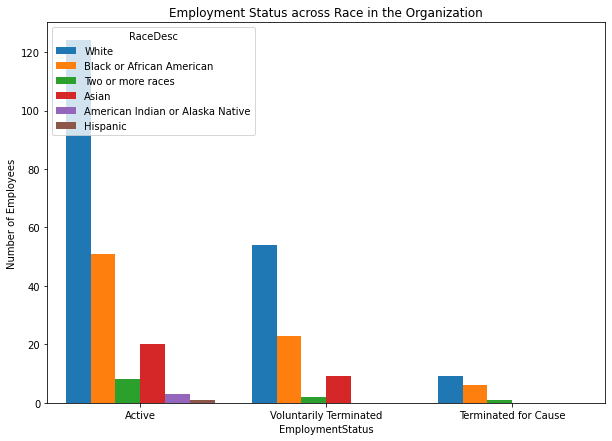

In [ ]:
plt.figure(figsize =(10, 7))
sns.countplot(x = 'EmploymentStatus', hue = 'RaceDesc', data = df,  saturation = 1)
plt.title('Employment Status across Race in the Organization')
plt.xlabel('EmploymentStatus')
plt.ylabel('Number of Employees')
plt.show()

All races except Hispanics and American Indian or ALaska native has been affected by employmnt termination

EMPLOYMENT STATUS ACROSS DEPARTMENTS

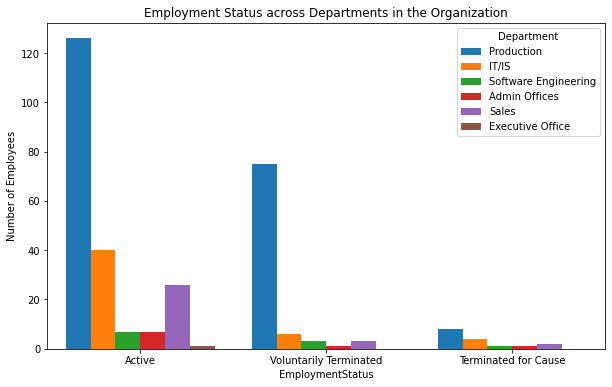

In [ ]:
plt.figure(figsize =(10, 6))
sns.countplot(x = 'EmploymentStatus', hue = 'Department', data = df,  saturation = 1)
plt.title('Employment Status across Departments in the Organization')
plt.xlabel('EmploymentStatus')
plt.ylabel('Number of Employees')
plt.show()

There is a high 'Voluntary Termination' in the Production department

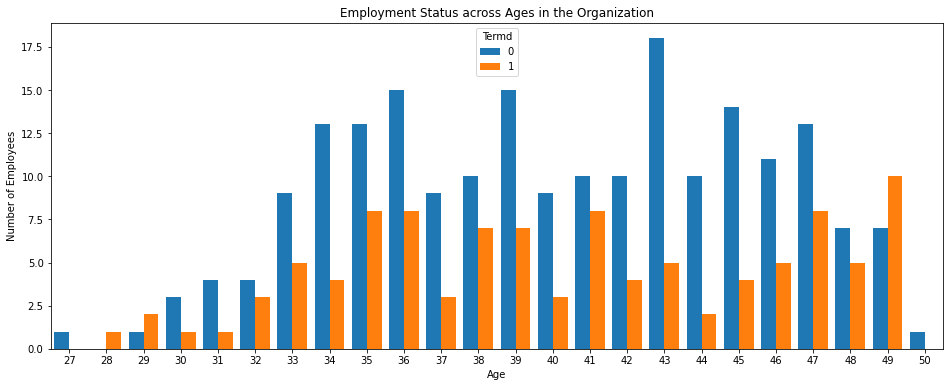

In [ ]:
plt.figure(figsize =(16, 6))
sns.countplot(x = 'Age', hue = 'Termd', data = df,  saturation = 1)
plt.title('Employment Status across Ages in the Organization')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.show()

DISTRIBUTION OF EMPLOYMENT STATUS

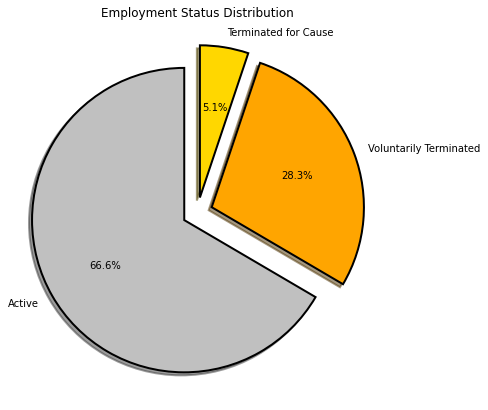

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("silver", "orange", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['EmploymentStatus'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Employment Status Distribution')
plt.show()

33.4% of employees have lost their jobs so far

YEARLY TERMINATION OF APPOINTMENT

In [ ]:
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], infer_datetime_format=True)
df['Year'] = df['DateofTermination'].dt.year
df['Year'] = df['DateofTermination'].dt.to_period('Y')

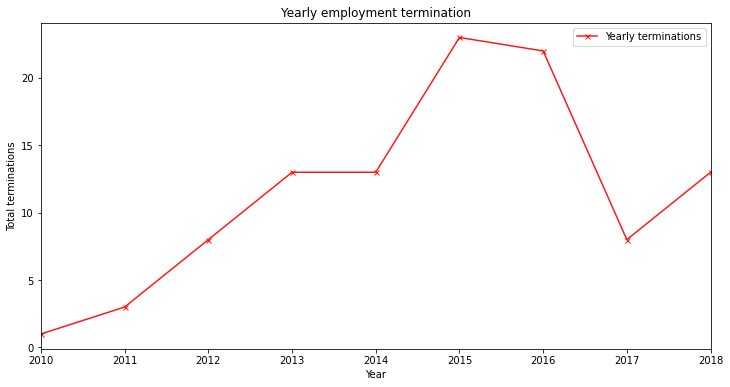

In [ ]:
yearly_termination = df.groupby('Year')['DateofTermination'].count()
fig, ax = plt.subplots(1, 1, figsize=[12, 6])
yearly_termination.plot(ax=ax, marker='x', alpha=.9, markersize=5, color='r', label='Yearly terminations')
ax.set_ylabel('Total terminations')
ax.set_xlabel('Year')
ax.set_title('Yearly employment termination')
ax.legend()
plt.show()

2015 has the peak of employment losses, followed by 2016 from the period of 2010 to 2018.It is beginning to rise again in 2018

DISTRIBUTION OF TERMINATION

In [ ]:
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])

In [ ]:
#establishing lenth of service for terminated employees
service_length=(df['DateofTermination'] - df['DateofHire']).dropna()
df['service_length'] = service_length

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   EmpID                       311 non-null    int64          
 1   GenderID                    311 non-null    int64          
 2   EmpStatusID                 311 non-null    int64          
 3   DeptID                      311 non-null    int64          
 4   PerfScoreID                 311 non-null    int64          
 5   Salary                      311 non-null    int64          
 6   Termd                       311 non-null    int64          
 7   Position                    311 non-null    object         
 8   State                       311 non-null    object         
 9   DOB                         311 non-null    object         
 10  Sex                         311 non-null    object         
 11  MaritalDesc                 311 non-null    o

In [ ]:
#establishing terminated employees
out_of_co = df[df.Termd == 1]

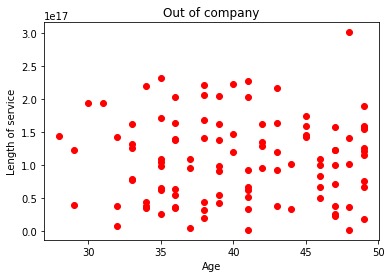

In [ ]:
fig, ax = plt.subplots()

ax.scatter(out_of_co.Age, out_of_co.service_length, color='r')
ax.set_xlabel('Age')
ax.set_ylabel('Length of service')
ax.set_title('Out of company')

plt.show()

There is no particular pattern for the job losses across the various ages in the organization

**Statistical/Computational-based Data Analysis**

REDEFINING DATAFRAME AND CHOOSING ONLY NEEDED VARIABLES

In [ ]:
df.columns

Index(['EmpID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'Salary',
       'Termd', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'RaceDesc', 'DateofHire', 'DateofTermination',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'EmpSatisfaction', 'LastPerformanceReview_Date', 'Absences', 'Age',
       'Year', 'service_length'],
      dtype='object')

In [ ]:
df1 = df[['GenderID','Salary', 'Termd', 'Department','PerformanceScore','EngagementSurvey','EmpSatisfaction','Age']]
df1.head()

,GenderID,Salary,Termd,Department,PerformanceScore,EngagementSurvey,EmpSatisfaction,Age
0,1,62506,0,Production,Exceeds,4.60,5,39
1,1,104437,1,IT/IS,Fully Meets,4.96,3,47
2,0,64955,1,Production,Fully Meets,3.02,3,34
3,0,64991,0,Production,Fully Meets,4.84,5,34
4,0,50825,1,Production,Fully Meets,5.00,4,33


SINCE THE ANALYTICAL QUESTION IS INTERESTED IN PREDICTING THE NUMBER OF PEOPLE THAT MAY TERMINATE THEIR APPOINTMENT, THE COLUMN WITH THE 'Termd' IS OUR INTEREST.  

In [ ]:
df1.shape

(311, 8)

In [ ]:
df1.info

<bound method DataFrame.info of      GenderID  Salary  Termd         Department PerformanceScore  \
0           1   62506      0  Production                 Exceeds   
1           1  104437      1              IT/IS      Fully Meets   
2           0   64955      1  Production             Fully Meets   
3           0   64991      0  Production             Fully Meets   
4           0   50825      1  Production             Fully Meets   
..        ...     ...    ...                ...              ...   
306         1   65893      0  Production             Fully Meets   
307         0   48513      1  Production                     PIP   
308         0  220450      0              IT/IS          Exceeds   
309         0   89292      0              IT/IS      Fully Meets   
310         0   45046      0  Production             Fully Meets   

     EngagementSurvey  EmpSatisfaction  Age  
0                4.60                5   39  
1                4.96                3   47  
2            

In [ ]:
df1.isna().sum()

GenderID            0
Salary              0
Termd               0
Department          0
PerformanceScore    0
EngagementSurvey    0
EmpSatisfaction     0
Age                 0
dtype: int64

FEATURE ENGINEERING

In [ ]:
df1['PerformanceScore'].unique()


array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

In [ ]:
df1['Department'].unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [ ]:
df1['Termd'].unique()

array([0, 1])

In [ ]:
#Converting to numeric values
df1.Department[df1.Department == 'Production       '] = 1
df1.Department[df1.Department == 'IT/IS'] = 2
df1.Department[df1.Department == 'Software Engineering'] = 3
df1.Department[df1.Department == 'Admin Offices'] = 4
df1.Department[df1.Department == 'Sales'] = 5
df1.Department[df1.Department == 'Executive Office'] = 6

df1.PerformanceScore[df1.PerformanceScore == 'PIP'] = 1
df1.PerformanceScore[df1.PerformanceScore == 'Needs Improvement'] = 2
df1.PerformanceScore[df1.PerformanceScore == 'Fully Meets'] = 3
df1.PerformanceScore[df1.PerformanceScore == 'Exceeds'] = 4

<ipython-input-61-9e3e102bf4cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Department[df1.Department == 'Production       '] = 1
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
<ipython-input-61-9e3e102bf4cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Department[df1.Department == 'IT/IS'] = 2
<ipython-input-61-9e3e1

In [ ]:
#changing data type to integer
X= df1[['GenderID','Salary','Department','PerformanceScore','EmpSatisfaction','EngagementSurvey','Age']]
X= X.astype('int')
X

,GenderID,Salary,Department,PerformanceScore,EmpSatisfaction,EngagementSurvey,Age
0,1,62506,1,4,5,4,39
1,1,104437,2,3,3,4,47
2,0,64955,1,3,3,3,34
3,0,64991,1,3,5,4,34
4,0,50825,1,3,4,5,33
...,...,...,...,...,...,...,...
306,1,65893,1,3,4,4,37
307,0,48513,1,1,2,3,40
308,0,220450,2,4,5,4,43
309,0,89292,2,3,3,5,43


Standardization of the data

In [ ]:
X=stats.zscore(X)

In [ ]:
y = df1['Termd']
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Termd, dtype: int64

Modelling - Train_Test_Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(248, 7) (248,) (63, 7) (63,)


**Machine Learning Algorithm; Using KNN Classification model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

In [ ]:
k = 8
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

Predicting of number of employees that will retain or lose their jobs

Having "1" as Active "2" as Voluntarily Terminated "3" as Terminated for Cause

In [ ]:
y_pred1 = neigh.predict(X_test)
y_pred1

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#Identifying the Unique outcomes of y_pred  
x = np.array(y_pred1)
print(np.unique(x))

[0 1]


In [ ]:
import collections
collections.Counter(x)

Counter({0: 59, 1: 4})

In [ ]:
print(len(x))

63


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_pred1, y_test)
print('Accuracy score is {}%'.format(accuracy_score * 100))


print(classification_report(y_test, y_pred1))

Accuracy score is 68.25396825396825%
              precision    recall  f1-score   support

           0       0.71      0.93      0.81        45
           1       0.25      0.06      0.09        18

    accuracy                           0.68        63
   macro avg       0.48      0.49      0.45        63
weighted avg       0.58      0.68      0.60        63



In [ ]:
#Changing the value of K to confirm model accuracy
Ks = 14
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred1=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred1)

mean_acc

array([0.50793651, 0.68253968, 0.63492063, 0.66666667, 0.68253968,
       0.65079365, 0.61904762, 0.68253968, 0.61904762, 0.65079365,
       0.65079365, 0.66666667, 0.61904762])

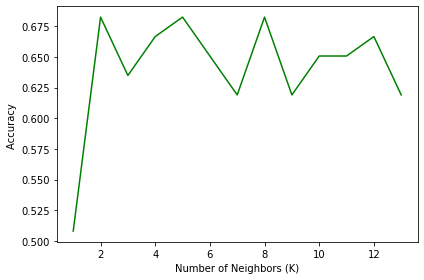

In [ ]:
#Plotting an accuracy graph
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

**Machine Learning Algorithm; Using Decision Tree Classification model as an alternative to validate earlier prediction**

In [ ]:
#target variable
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Termd, dtype: int64

In [ ]:
#setting up the decision tree
term_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
term_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
#Fitting the data with the training feature matrix X_train and training response vector y_train
term_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_pred2 = term_tree.predict(X_test)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
collections.Counter(y_pred2)

Counter({0: 54, 1: 9})

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_pred2, y_test)
print('Accuracy score is {}%'.format(accuracy_score * 100))


print(classification_report(y_test, y_pred2))

Accuracy score is 63.49206349206349%
              precision    recall  f1-score   support

           0       0.70      0.84      0.77        45
           1       0.22      0.11      0.15        18

    accuracy                           0.63        63
   macro avg       0.46      0.48      0.46        63
weighted avg       0.57      0.63      0.59        63



**Machine Learning Algorithm; Using Random Forest Classification model as an alternative to validate earlier predictions**

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred3 = rfc.predict(X_test)
y_pred3

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
collections.Counter(y_pred3)

Counter({1: 16, 0: 47})

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_pred3, y_test)
print('Accuracy score is {}%'.format(accuracy_score * 100))


print(classification_report(y_test, y_pred3))

Accuracy score is 55.55555555555556%
              precision    recall  f1-score   support

           0       0.68      0.71      0.70        45
           1       0.19      0.17      0.18        18

    accuracy                           0.56        63
   macro avg       0.43      0.44      0.44        63
weighted avg       0.54      0.56      0.55        63



HYPER PARAMETER TUNING

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
param_vals = {'max_depth': [80, None], 'max_features': randint(1, 9), 'n_estimators': [200, 400], 'min_samples_leaf': randint(1, 9), 'criterion': ['gini', 'entropy']}
rfc_rf = RandomizedSearchCV(estimator=rfc, param_distributions=param_vals, cv=5, scoring='accuracy')

rfc_rf.fit(X_train, y_train)

print("Tuned RandomForestClassifier(): {}".format(rfc_rf.best_params_))
print("Best score is {}".format(rfc_rf.best_score_))

Tuned RandomForestClassifier(): {'criterion': 'entropy', 'max_depth': 80, 'max_features': 1, 'min_samples_leaf': 7, 'n_estimators': 400}
Best score is 0.6573061224489796


In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
term_tree = DecisionTreeClassifier()
param_vals = {'max_depth': [80, None], 'max_features': randint(1, 9), 'min_samples_leaf': randint(1, 9), 'criterion': ['gini', 'entropy']}

term_tree_rf = RandomizedSearchCV(estimator=term_tree, param_distributions=param_vals, cv=5, scoring='accuracy')


term_tree_rf.fit(X_train, y_train)

print("Tuned DecisionTreeClassifier(): {}".format(term_tree_rf.best_params_))
print("Best score is {}".format(term_tree_rf.best_score_))

Tuned DecisionTreeClassifier(): {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 2}
Best score is 0.641469387755102
